# CICERO SCM notebook 1

Import some stuff

In [1]:
import sys
import os
import shutil
import matplotlib.pyplot as plt
import pandas as pd
import pandas.testing as pdt

Install the model, if needed

In [2]:
!pip install -e ..


Obtaining file:///home/sanderson/ciceroscm
  Attempting uninstall: openscm-runner
    Found existing installation: openscm-runner 0+untagged.54.gd3a7862
    Uninstalling openscm-runner-0+untagged.54.gd3a7862:
      Successfully uninstalled openscm-runner-0+untagged.54.gd3a7862
  Running setup.py develop for openscm-runner


Import the model wrapper function

In [3]:
sys.path.append('../src')
from ciceroscm import CICEROSCM

set up input/output directories

In [4]:
cscm = CICEROSCM()
# outdir_save = os.path.join(os.getcwd(), "output")
outdir = os.getcwd()+'/output/'
if not os.path.exists(outdir):
    os.makedirs(outdir)
test_data_dir = os.getcwd()+'/../tests/test-data'
test_data_dir 

'/home/sanderson/ciceroscm/scripts/../tests/test-data'

Run the model

In [5]:
    cscm._run(
        {
            "gaspamfile": os.path.join(test_data_dir, "gases_v1RCMIP.txt"),
            "output_prefix": outdir,
            "nyend": 2100,
            "concentrations_file": os.path.join(test_data_dir, "ssp245_conc_RCMIP.txt"),
            "emissions_file": os.path.join(test_data_dir, "ssp245_em_RCMIP.txt"),
            "nat_ch4_file": os.path.join(test_data_dir, "natemis_ch4.txt"),
            "nat_n2o_file": os.path.join(test_data_dir, "natemis_n2o.txt"),
        },
    )

Parameter rlamdo not in pamset. Using default value 16.0
Parameter akapa not in pamset. Using default value 0.634
Parameter cpi not in pamset. Using default value 0.4
Parameter W not in pamset. Using default value 4.0
Parameter beto not in pamset. Using default value 3.5
Parameter threstemp not in pamset. Using default value 7.0
Parameter lambda not in pamset. Using default value 0.54
Parameter mixed not in pamset. Using default value 60.0
Parameter foan not in pamset. Using default value 0.61
Parameter foas not in pamset. Using default value 0.81
Parameter ebbeta not in pamset. Using default value 0.0
Parameter fnso not in pamset. Using default value 0.7531
Parameter lm not in pamset. Using default value 40
Parameter ldtime not in pamset. Using default value 12
Parameter lamb not in pamset. Using default value 0.8
Parameter qbmb not in pamset. Using default value 0.03
Parameter qo3 not in pamset. Using default value 0.4
Parameter qdirso2 not in pamset. Using default value -0.457
Param

Read model output into Pandas dataframes

In [6]:
df_temp=pd.read_csv(outdir+'/output_temp.txt', sep='\t', index_col=0)
df_conc=pd.read_csv(outdir+'/output_conc.txt', sep='\t', index_col=0)
df_em=pd.read_csv(outdir+'/output_em.txt', sep='\t', index_col=0)
df_forc=pd.read_csv(outdir+'/output_forc.txt', sep='\t', index_col=0)
df_temp

,dT_glob,dT_NH,dT_SH,dT_glob_air,dT_NH_air,dT_SH_air,dT_glob_sea,dT_NH_sea,dT_SHsea,dSL(m),dSL_thermal(m),dSL_ice(m)
Year,,,,,,,,,,,,
1750,-0.000733,-0.001276,-0.000189,-0.001179,-0.002037,-0.000321,-0.000474,-0.000789,-0.000158,-0.000013,-0.000008,-0.000004
1751,-0.002298,-0.003737,-0.000859,-0.002992,-0.004962,-0.001023,-0.001887,-0.002953,-0.000820,-0.000056,-0.000037,-0.000018
1752,-0.003038,-0.004673,-0.001403,-0.003587,-0.005726,-0.001448,-0.002696,-0.003999,-0.001393,-0.000098,-0.000062,-0.000036
1753,-0.003383,-0.005050,-0.001716,-0.003831,-0.006000,-0.001662,-0.003086,-0.004443,-0.001729,-0.000136,-0.000080,-0.000055
1754,-0.003581,-0.005260,-0.001902,-0.003966,-0.006155,-0.001777,-0.003310,-0.004688,-0.001931,-0.000170,-0.000095,-0.000075
...,...,...,...,...,...,...,...,...,...,...,...,...
2096,2.087420,2.093280,2.081560,2.129310,2.129250,2.129380,2.070320,2.070290,2.070350,0.404158,0.193702,0.210456
2097,2.089160,2.094910,2.083410,2.130560,2.130440,2.130680,2.072260,2.072200,2.072320,0.406220,0.194898,0.211322
2098,2.090640,2.096280,2.085000,2.131550,2.131380,2.131730,2.073950,2.073850,2.074040,0.408247,0.196077,0.212171


Plot some output

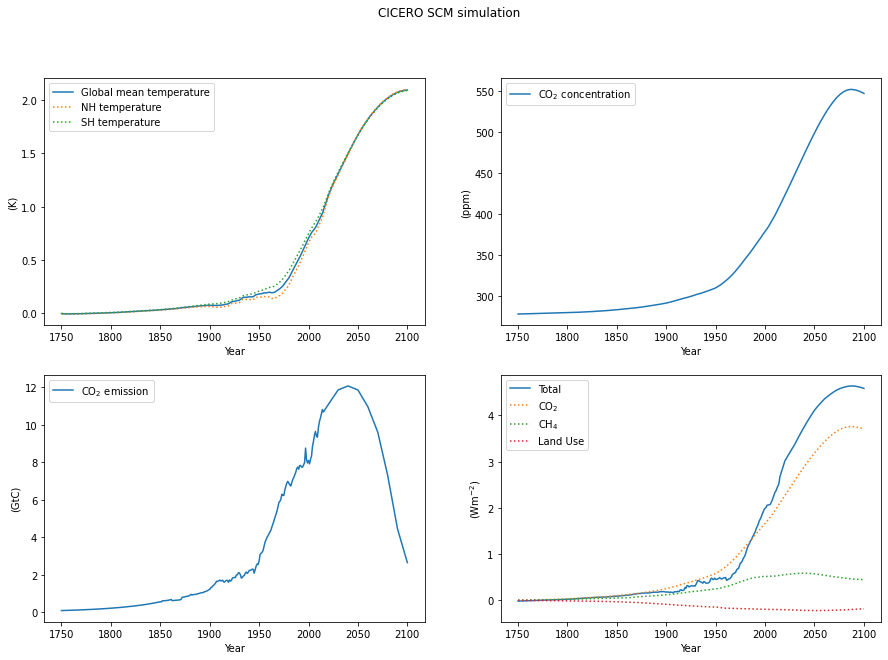

In [7]:


fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(15,10))
axs=axs.flatten()
fig.suptitle('CICERO SCM simulation')

df_temp['dT_glob'].plot(ylabel='(K)',ax=axs[0])
df_temp['dT_NH'].plot(ylabel='(K)',ax=axs[0],linestyle=':')
df_temp['dT_SH'].plot(ylabel='(K)',ax=axs[0],linestyle=':')
axs[0].legend(['Global mean temperature','NH temperature','SH temperature'])

df_conc['CO2'].plot(ylabel='(ppm)',ax=axs[1])
axs[1].legend([r'CO$_2$ concentration'])

df_em['CO2'].plot(ylabel='(GtC)',ax=axs[2])
axs[2].legend([r'CO$_2$ emission'])

df_forc['Total_forcing'].plot(ylabel='(Wm$^{-2}$)',ax=axs[3])
df_forc['CO2'].plot(ylabel='(Wm$^{-2}$)',ax=axs[3],linestyle=':')
df_forc['CH4'].plot(ylabel='(Wm$^{-2}$)',ax=axs[3],linestyle=':')
df_forc['LANDUSE'].plot(ylabel='(Wm$^{-2}$)',ax=axs[3],linestyle=':')

axs[3].legend([r'Total','CO$_2$','CH$_4$','Land Use'])